<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Cardiovascular_Diseases_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CVD_cleaned.csv')

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [6]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [7]:
cols = ['General_Health','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Smoking_History']

In [8]:
for i in cols:
    print(df[i].value_counts())
    print()

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

Yes    239381
No      69473
Name: Exercise, dtype: int64

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64

No     278976
Yes     29878
Name: Other_Cancer, dtype: int64

No     246953
Yes     61901
Name: Depression, dtype: int64

No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

No     207783
Yes    101071
Name: Arthritis, dtype: int64

Female    160196
Male      148658
Name: Sex, dtype: int64

65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name:

<Axes: ylabel='Checkup'>

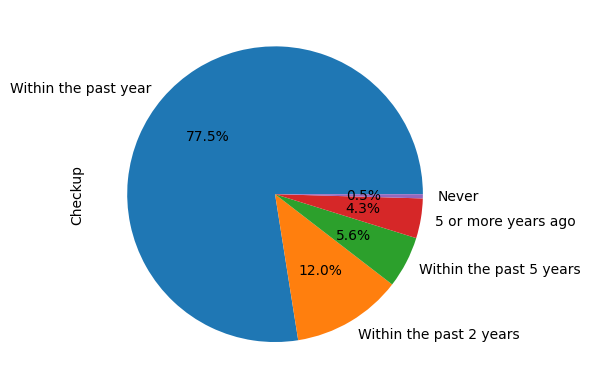

In [9]:
df['Checkup'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: >

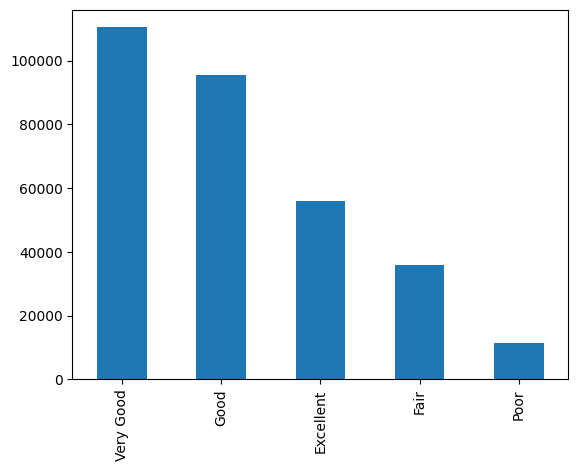

In [10]:
df['General_Health'].value_counts().plot.bar()

<Axes: ylabel='Sex'>

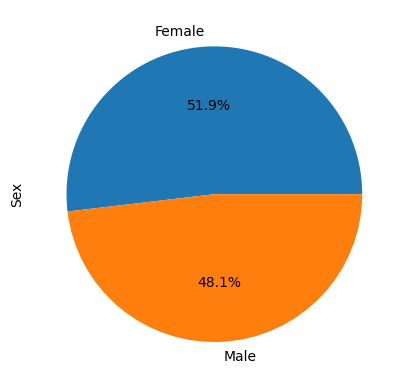

In [11]:
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')

In [12]:
cols_tmp = ['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Arthritis','Smoking_History']

In [13]:
df[cols_tmp] = df[cols_tmp].replace({
    'Yes':1,
    'No':0
})
df[cols_tmp].head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Smoking_History
0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0
4,0,0,0,0,0,0,1


In [14]:
df['General_Health'] = df['General_Health'].replace({
    'Very Good':5,
    'Good':4,
    'Excellent':3,
    'Fair':2,
    'Poor':1
})

In [15]:
df['Sex'] = df['Sex'].replace({
    'Male':0,
    'Female':1
})

In [16]:
df['Checkup'] = df['Checkup'].replace({
    'Never':0,
    'Within the past year':1,
    'Within the past 2 years':2,
    'Within the past 5 years':3,
    '5 or more years ago':4
})

df['Checkup'].value_counts()

1    239371
2     37213
3     17442
4     13421
0      1407
Name: Checkup, dtype: int64

In [17]:
df['Age_Category'] = df['Age_Category'].replace({
    '80+':'80-100'
})

In [18]:
new_columns = df['Age_Category'].str.split('-', expand=True)
new_columns.columns = ['Age_min','Age_max']
new_columns = new_columns.astype(int)
df = pd.concat([df, new_columns], axis=1)
df = df.drop(['Age_Category'], axis=1)
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_min,Age_max
0,1,2,0,0,0,0,0,No,1,1,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,70,74
1,5,1,0,1,0,0,0,Yes,0,1,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,70,74
2,5,1,1,0,0,0,0,Yes,0,1,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,60,64
3,1,1,1,1,0,0,0,Yes,0,0,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,75,79
4,4,1,0,0,0,0,0,No,0,0,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,80,100


In [19]:
df['Diabetes'].value_counts()

No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

In [20]:
df['Diabetes'] = df['Diabetes'].replace({
    'No': 0,
    'Yes': 1,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 0

})

In [21]:
df.sample(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_min,Age_max
99912,3,2,1,0,0,0,0,0,0,0,180.0,54.43,16.74,0,4.0,12.0,0.0,4.0,18,24
229551,3,2,1,0,0,0,0,0,0,0,183.0,95.25,28.48,1,28.0,30.0,30.0,0.0,50,54


In [22]:
X = df.drop('Heart_Disease',axis = 1)
y = df['Heart_Disease']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

91.93692867241546


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

85.976234930982


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

91.84735098265647


In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

81.18760590133503


In [28]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

91.93153242604446


In [29]:
df.shape

(308854, 20)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[0.        , 0.25      , 1.        , ..., 0.0078125 , 0.51612903,
        0.39473684],
       [0.25      , 0.25      , 0.        , ..., 0.125     , 0.67741935,
        0.52631579],
       [0.75      , 0.25      , 1.        , ..., 0.0234375 , 0.35483871,
        0.26315789],
       ...,
       [1.        , 0.25      , 1.        , ..., 0.        , 0.67741935,
        0.52631579],
       [1.        , 0.25      , 0.        , ..., 0.        , 0.51612903,
        0.39473684],
       [1.        , 0.25      , 1.        , ..., 0.0078125 , 0.59677419,
        0.46052632]])

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Accuracy

In [51]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
6757/6757 [==============================] - 11s 2ms/step - loss: 0.2503 - accuracy: 0.9183 - val_loss: 0.2341 - val_accuracy: 0.9181
Epoch 2/10
6757/6757 [==============================] - 12s 2ms/step - loss: 0.2304 - accuracy: 0.9196 - val_loss: 0.2303 - val_accuracy: 0.9181
Epoch 3/10
6757/6757 [==============================] - 11s 2ms/step - loss: 0.2278 - accuracy: 0.9196 - val_loss: 0.2286 - val_accuracy: 0.9181
Epoch 4/10
6757/6757 [==============================] - 11s 2ms/step - loss: 0.2271 - accuracy: 0.9196 - val_loss: 0.2394 - val_accuracy: 0.9181
Epoch 5/10
6757/6757 [==============================] - 13s 2ms/step - loss: 0.2269 - accuracy: 0.9196 - val_loss: 0.2318 - val_accuracy: 0.9181
Epoch 6/10
6757/6757 [==============================] - 11s 2ms/step - loss: 0.2261 - accuracy: 0.9196 - val_loss: 0.2360 - val_accuracy: 0.9181
Epoch 7/10
6757/6757 [==============================] - 10s 2ms/step - loss: 0.2259 - accuracy: 0.9196 - val_loss: 0.2283 - val_ac

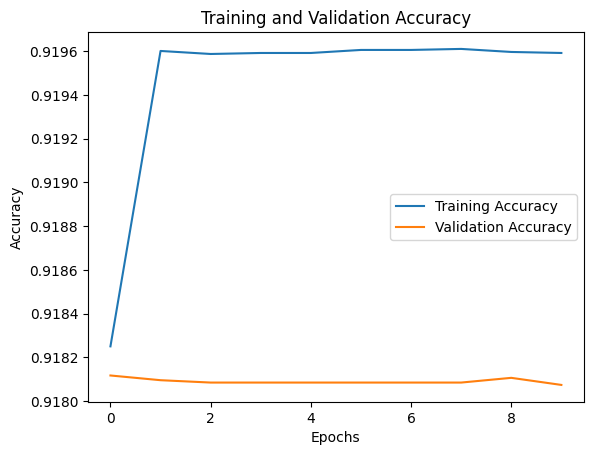

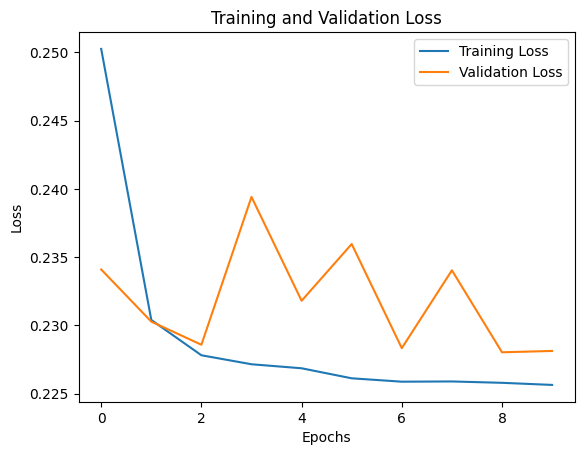

In [52]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Conclusion
1. GradientBoost and ANN shows the Best Performance.
2. GaussianNB has the Worst Performance.